In [1]:
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline
from scipy.io import loadmat
import decimal
data=loadmat(r'C:\Users\saminens\Desktop\ML\ex6data1')

In [2]:
X=data['X']
y=data['y']
print(X.shape,y.shape)

(51, 2) (51, 1)


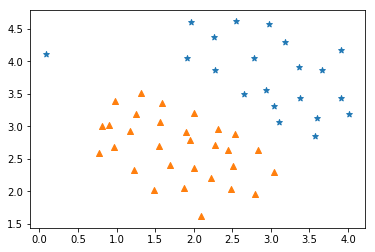

In [3]:
pos= y[:,0]==1
neg=y[:,0]==0
pt.scatter(X[pos][:,0],X[pos][:,1], marker='*')
pt.scatter(X[neg][:,0],X[neg][:,1], marker='^')

In [4]:
#change C and see how the plot changes
from sklearn import svm
model=svm.SVC(C=100,kernel='linear')
model.fit(X,y.ravel())

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

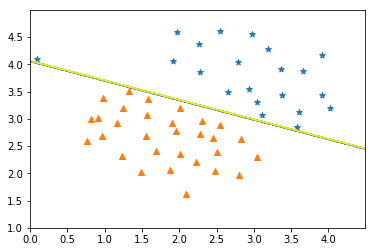

In [5]:
pos= y[:,0]==1
neg=y[:,0]==0
pt.scatter(X[pos][:,0],X[pos][:,1], marker='*')
pt.scatter(X[neg][:,0],X[neg][:,1], marker='^')
x1,x2=np.meshgrid(np.arange(0,4.5,0.01),np.arange(1,5,0.01))
z=model.predict(np.c_[x1.ravel(),x2.ravel()])
z=z.reshape(x1.shape)
pt.contour(x1,x2,z)

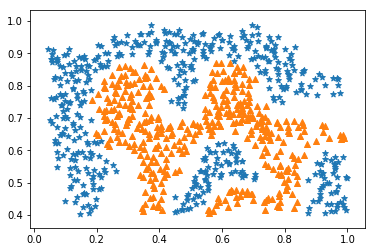

In [6]:
#Gaussian kernel - Ahoy!
data1=loadmat(r'C:\Users\saminens\Desktop\ML\ex6data2')
X1=data1['X']
y1=data1['y']
pos= y1[:,0]==1
neg=y1[:,0]==0
pt.scatter(X1[pos][:,0],X1[pos][:,1], marker='*')
pt.scatter(X1[neg][:,0],X1[neg][:,1], marker='^')

In [7]:
def gaussiankernel(x1,x2,sigma):
    x1=np.asarray(x1)
    x2=np.asarray(x2)
    p= -1 * np.sum(np.square(x1-x2)) / (2*np.square(sigma))
    similarity=np.exp(p)
    return similarity


In [8]:
#check if function is right, with the below values, the similarity should be 0.324652467
x1 = [1, 2, 1]; x2 = [0, 4, -1]; sigma = 2;
sim = gaussiankernel(x1, x2, sigma);
print(sim)

0.324652467358


In [9]:
sigma=0.1
model_1=svm.SVC(C=1,kernel='rbf',gamma=1/(2*sigma**2))
model_1.fit(X1,y1.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

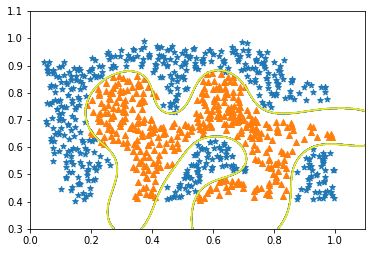

In [10]:
pos= y1[:,0]==1
neg=y1[:,0]==0
pt.scatter(X1[pos][:,0],X1[pos][:,1], marker='*')
pt.scatter(X1[neg][:,0],X1[neg][:,1], marker='^')
x3,x4=np.meshgrid(np.arange(0,1.1,0.001),np.arange(0.3,1.1,0.001))
z1=model_1.predict(np.c_[x3.ravel(),x4.ravel()])
z1=z1.reshape(x3.shape)
pt.contour(x3,x4,z1)

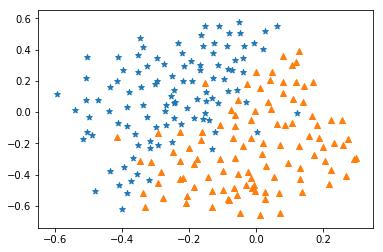

In [11]:
#dataset 3
data2=loadmat(r'C:\Users\saminens\Desktop\ML\ex6data3')
X2=data2['X']
y2=data2['y']
pos= y2[:,0]==1
neg=y2[:,0]==0
pt.scatter(X2[pos][:,0],X2[pos][:,1], marker='*')
pt.scatter(X2[neg][:,0],X2[neg][:,1], marker='^')

In [12]:
C=1
sigma=0.3
tvals=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30] #8 is the number of elements
tvals=np.asarray(tvals)
error=[]
result=[]
for i in range(8):
    for j in range(8):
        tC=tvals[i]
        tsigma=tvals[j]
        model=svm.SVC(tC,kernel='rbf',gamma=1/(2*tsigma**2))
        model.fit(X2,y2.ravel())
        error.append(model.score(data2['Xval'],data2['yval'].ravel()))
        result.append((tC,tsigma))
            
    

In [13]:
maxindex=np.argmax(error)
C_max,sigma_max=result[maxindex]
C_max,sigma_max

(1.0, 0.10000000000000001)

In [14]:
model_2=svm.SVC(C_max,kernel='rbf',gamma=1/(2*sigma_max**2))
model_2.fit(X2,y2.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.999999999999993,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

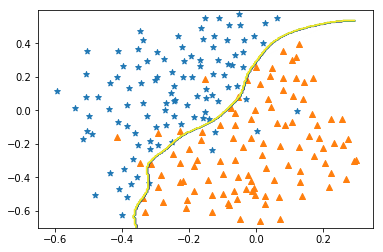

In [15]:
X2=data2['X']
y2=data2['y']
pos= y2[:,0]==1
neg=y2[:,0]==0
pt.scatter(X2[pos][:,0],X2[pos][:,1], marker='*')
pt.scatter(X2[neg][:,0],X2[neg][:,1], marker='^')
#Take note on the data ranges! always check on plot. try changing values in np.arange()
x5,x6=np.meshgrid(np.arange(-0.6, 0.3, 0.004),np.arange(-0.7, 0.6, 0.004))
z2=model_2.predict(np.c_[x5.ravel(),x6.ravel()])
z2=z2.reshape(x5.shape)
pt.contour(x5,x6,z2)

In [16]:
#Classifying Spam mails
spam_train=loadmat(r'C:\Users\saminens\Desktop\ML\spamTrain')
spam_test=loadmat(r'C:\Users\saminens\Desktop\ML\spamTest')
X_train=spam_train['X']
y_train=spam_train['y']
X_test=spam_test['Xtest']
y_test=spam_test['ytest']


In [17]:
#You can test on different C values to alter the train and test accuracy
model_spam=svm.SVC(C=0.1,kernel='linear')
model_spam.fit(X_train,y_train.ravel())
train_accuracy=model_spam.score(X_train,y_train.ravel())
test_accuracy=model_spam.score(X_test,y_test.ravel())
train_accuracy*100,test_accuracy*100

(99.825000000000003, 98.900000000000006)

In [18]:
X_train.shape

(4000, 1899)

In [19]:
#Check your own Spam Mails...
def getvocablist():
    with open(r'C:\Users\saminens\Desktop\ML\vocab.txt') as vocabFile:

        # Store all dictionary words in dictionary vocabList
        vocabList = {}
        for line in vocabFile.readlines():
            i, word = line.split()
            vocabList[word] = int(i)

    return vocabList

In [20]:
import re
from nltk import PorterStemmer
def processEmail(email_contents):
    vocablist=getvocablist()
    word_indices=[]
    email_contents=email_contents.lower()
    #replace html
    email_contents = re.sub('<[^<>]+>', ' ', email_contents)
    #replace handle numbers
    email_contents = re.sub('[0-9]+', 'number', email_contents)
    #replace url
    email_contents = re.sub('(http|https)://[^\s]*', 'httpaddr', email_contents)
    #replace email address
    email_contents = re.sub('[^\s]+@[^\s]+', 'emailaddr', email_contents)
    #replace signs
    email_contents = re.sub('[$]+', 'dollar', email_contents)
   
    #Tokenize emails
    l=0
    email_contents = re.split(r'[@$/#.-:&\*\+=\[\]?!(){},\'\'\">_<;%\s\n\r\t]+', email_contents)
    ps = PorterStemmer()
    for x in email_contents:
        
        try:
            x = ps.stem(x.strip())
        except:
            x = ''
            continue
        if len(x)<1:
            continue
        idx = vocablist[x] if x in vocablist else 0
        if idx > 0:
            word_indices.append(idx)
        
        if (l + len(x) + 1) > 78:
           # print ("")
            l = 0
       # print('{:s}'.format(x)),
        l = l + len(x) + 1     
    return word_indices        

In [21]:
def emailFeatures(word_indices):
    n=1899
    x=np.zeros((n,1))
    x[word_indices]=1
    return x

In [22]:
#top predictors for spam
from sklearn.feature_extraction import DictVectorizer
d=model_spam.coef_[0]   #only linear kernel has weights assigned to features, there is an array inside an array
indices=d.argsort()[::-1][:15]
vocabList=sorted(getvocablist().keys())
for idx in indices:
    print( ' {:s} ({:f}) '.format( vocabList[idx], float(d[idx]) ) )
    
file=open(r'C:\Users\saminens\Desktop\ML\spamSample1.txt')
file_contents=file.readlines()
for x in file_contents:
    word_indices=processEmail(x)
    features= emailFeatures(word_indices)

 our (0.500614) 
 click (0.465916) 
 remov (0.422869) 
 guarante (0.383622) 
 visit (0.367710) 
 basenumb (0.345064) 
 dollar (0.323632) 
 will (0.269724) 
 price (0.267298) 
 pleas (0.261169) 
 most (0.257298) 
 nbsp (0.253941) 
 lo (0.253467) 
 ga (0.248297) 
 hour (0.246404) 


In [23]:
for x in file_contents:
    word_indices=processEmail(x)
    print(word_indices)

[471, 1893, 1809, 1699, 997, 479, 1182, 1064, 1231, 1827]
[]
[]
[]
[810, 1893, 1070, 74, 1346, 837]
[1852, 1242, 1699, 1893, 1631, 1665, 1852]
[997, 1893, 479, 1120, 1231, 1827, 1182, 1064, 1676, 877, 1113]
[]
[]
[]
[234, 1191, 1120, 792, 1120, 1699, 708, 1666]
[440]
[]
[]
[]
[]
[]
[]
[]
[1093, 1230, 1844, 1809, 1699, 997, 1490, 997]
[1666, 234, 74, 708, 1666, 608]
[]
[869, 1120, 1048, 825, 1896, 1117]
[]
[]
[]
[]
[]
[]
[]
[976, 676, 1699, 1895, 234, 74, 1852, 867, 1893]
[1699, 1230, 956, 1896, 1844]
[387, 997, 479, 1120, 1265, 1231, 1827]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [24]:
model_spam.coef_

array([[ 0.00793208,  0.01563324,  0.05546492, ..., -0.08670606,
        -0.00661274,  0.06506632]])

In [25]:
#lets test it!!!....on sample mail 1
#if spam return 1, else 0
predict=model_spam.predict(features.T)
if predict==1:
    print('Its a spam')
else:
    print("not a spam")

Its a spam


In [30]:
#test on sample mail 2
file2=open(r'C:\Users\saminens\Desktop\ML\emailSample2.txt')
file2_contents=file2.read()
word_indices=processEmail(file2_contents)
features= emailFeatures(word_indices)
predict=model_spam.predict(features.T)
if predict==1:
    print('Its a spam')
else:
    print("not a spam")

not a spam
